References-

https://en.wikipedia.org/wiki/Exponential_smoothing
https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html
https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel('../Data/monthly_data_total.xlsx')

In [5]:
df.head()

,Date,Import,Export
0,2006-01-01,12519.71,9143.66
1,2006-02-01,11479.69,8993.29
2,2006-03-01,14314.02,11560.97
3,2006-04-01,12924.18,8624.66
4,2006-05-01,15105.67,10109.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    165 non-null    datetime64[ns]
 1   Import  165 non-null    float64       
 2   Export  165 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.9 KB


In [7]:
df.index = df.Date

In [8]:
df.head()

,Date,Import,Export
Date,,,
2006-01-01,2006-01-01,12519.71,9143.66
2006-02-01,2006-02-01,11479.69,8993.29
2006-03-01,2006-03-01,14314.02,11560.97
2006-04-01,2006-04-01,12924.18,8624.66
2006-05-01,2006-05-01,15105.67,10109.30


In [9]:
df = df[['Import', 'Export']]

In [10]:
df.head()

,Import,Export
Date,,
2006-01-01,12519.71,9143.66
2006-02-01,11479.69,8993.29
2006-03-01,14314.02,11560.97
2006-04-01,12924.18,8624.66
2006-05-01,15105.67,10109.30


In [11]:
df.shape

(165, 2)

In [12]:
df = df.resample('M').sum()

In [13]:
df.shape

(165, 2)

Text(0, 0.5, 'Values in million US $')

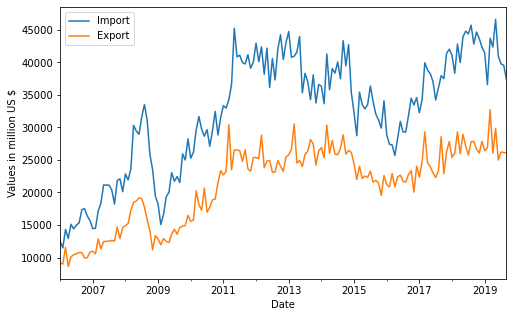

In [14]:
df.plot(figsize = (8,5))
plt.ylabel('Values in million US $')

In [15]:
df_train = df[:-12]

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_import = SimpleExpSmoothing(df_train['Import']).fit(smoothing_level=0.6,optimized=False)
yhat_import = model_import.forecast(24)
model_export = SimpleExpSmoothing(df_train['Export']).fit(smoothing_level=0.6,optimized=False)
yhat_export = model_export.forecast(24)

In [39]:
# from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# model_import = SimpleExpSmoothing(df_train['Import']).fit()
# yhat_import = model_import.forecast(24)
# model_export = SimpleExpSmoothing(df_train['Export']).fit()
# yhat_export = model_export.forecast(24)

In [34]:
%matplotlib notebook

<IPython.core.display.Javascript object>


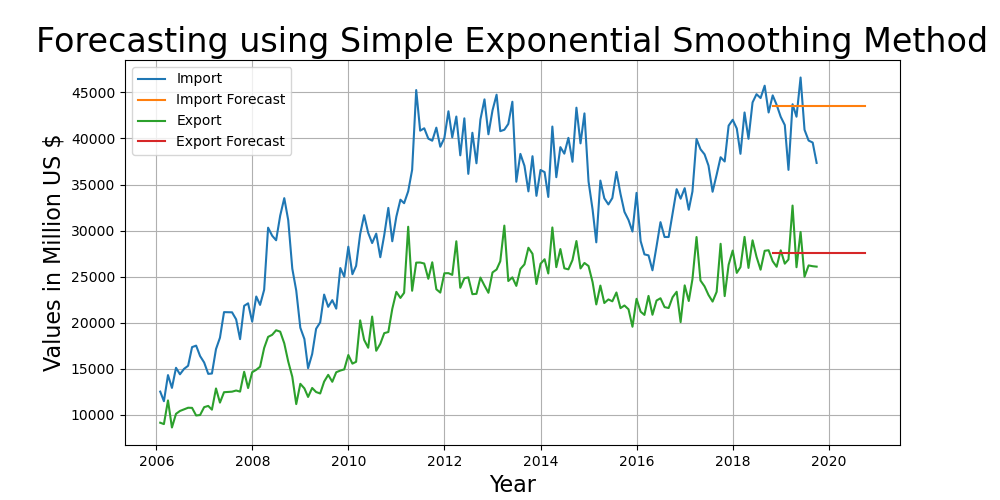

In [42]:
plt.figure(figsize=(10,5))
plt.plot( df['Import'], label='Import')
plt.plot( yhat_import, label='Import Forecast')
plt.plot( df['Export'], label='Export')
plt.plot( yhat_export, label='Export Forecast')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Values in Million US $', fontsize = 16)
plt.title('Forecasting using Simple Exponential Smoothing Method', fontsize = 24)
plt.grid()
plt.legend()
plt.show()

In [36]:
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

In [44]:
rmse(df['Import'][-12:], yhat_import[:12]).round(2), rmse(df['Export'][-12:],  yhat_export[:12]).round(2)

(3454.44, 2073.22)

In [23]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# model_import = ExponentialSmoothing(df_train['Import'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit()
# yhat_import = model_import.forecast(24)
# model_export = ExponentialSmoothing(df_train['Export'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit()
# yhat_export = model_export.forecast(24)

In [41]:
# model_import.model.params